In [32]:
# imports
import pandas as pd
import numpy as np
from label_utils import *
%load_ext autoreload
%autoreload 2


# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading in the data

In [33]:
data = pd.read_csv("merged_data_ver_1.1.csv", index_col=0)
data.head()

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,country,league,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribbling,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribbling,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
0,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.00,1.73,3.40,4.2,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
1,1,1,1.75,3.50,4.33,1.80,3.40,3.95,1.70,3.3,4.0,1.72,3.40,4.00,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.4,4.0,1.80,3.3,4.0,1.90,3.25,3.75,1.83,3.30,3.8,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
2,2,1,1.91,3.30,3.75,1.91,3.30,3.70,1.90,3.2,3.4,1.91,3.20,3.50,NaN,NaN,NaN,1.83,3.30,4.00,2.00,3.3,3.8,1.80,3.3,3.8,1.95,3.25,3.50,NaN,NaN,NaN,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
3,2,2,2.00,3.25,3.50,2.10,3.20,3.20,2.00,3.1,3.2,2.00,3.20,3.20,NaN,NaN,NaN,1.90,3.25,3.50,2.10,3.3,3.4,2.10,3.3,3.1,2.00,3.20,3.50,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,0.333333,0.666667,0.0,0.333333,0.4,0.4,0.0,0.2,0.5,0.3,0.2,0.3,0.50,0.25,0.45,0.2
4,4,0,1.91,3.30,3.80,1.95,3.25,3.55,2.10,3.2,2.9,1.91,3.25,3.40,NaN,NaN,NaN,2.00,3.30,3.40,2.05,3.3,3.6,1.90,3.3,3.6,2.05,3.25,3.30,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,3

In [34]:
data = process_data(data)

In [35]:
x_train, y_train, x_test, y_test, bet_train, bet_test = split_data_split_bet_agency(data)
x_train.head()

,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
10872,-0.122081,0,-1,-0.215351,0,-1,-0.124373,0,0.020237,0,0.264604,1,-1,0.066267,0,-0.310802,0,0.403732,1,1,-0.121011,0,-1,-0.297636,-1,-1,0.045991,0,-0.146348,0,0.264597,1,-1,-0.341973,-1,-0.311819,0,0.176136,0,1,0.666667,0.333333,0.666667,0.333333,0.4,0.4,0.4,0.4,0.3,0.2,0.6,0.2,0.40,0.20,0.60,0.25
11599,-0.205415,0,-1,0.034649,0,1,-0.293864,0,-0.313097,0,-0.080224,0,1,-0.239855,0,-0.102469,0,-0.050813,0,-1,0.128989,0,-1,-0.130970,0,1,-0.038755,0,-0.313015,0,0.178390,0,1,-0.035850,0,-0.103486,0,-0.051137,0,-1,0.666667,0.333333,0.666667,0.000000,0.4,0.6,0.6,0.2,0.3,0.5,0.4,0.2,0.35,0.30,0.40,0.15
9601,0.177919,0,0,-0.098684,0,1,0.079017,0,-0.063097,0,-0.045741,0,1,-0.076590,0,-0.081635,0,0.062823,0,-1,0.162322,0,0,0.352364,1,1,-0.191297,0,0.153652,0,0.023218,0,1,0.004966,0,0.104848,0,-0.005682,0,-1,0.333333,0.333333,0.333333,0.000000,0.2,0.2,0.6,0.0,0.2,0.2,0.5,0.1,0.35,0.20,0.45,0.20
10085,0.094585,0,0,-0.098684,0,1,0.197661,0,0.120237,0,-0.304362,0,1,0.168308,0,0.189198,0,0.085550,0,-1,0.345655,1,-1,0.119030,0,1,0.418872,1,0.003652,0,0.109424,0,1,0.290680,0,0.459014,1,-0.051137,0,-1,0.333333,0.333333,0.666667,0.000000,0.4,0.2,0.6,0.0,0.3,0.3,0.6,0.1,0.30,0.35,0.60,0.15
10550,-0.122081,0,-1,-0.298684,-1,1,-0.293864,0,-0.146430,0,0.178397,0,1,-0.341896,-1,0.418365,1,0.290096,0,1,0.295655,1,-1,-0.297636,-1,-1,0.130736,0,0.103652,0,0.264597,1,-1,0.168231,0,-0.415986,-1,0.403409,1,1,0.333333,0.000000,1.000000,0.000000,0.2,0.4,1.0,0.0,0.3,0.2,0.8,0.2,0.35,0.20,0.65,0.20


In [36]:
bet_test.head()

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1,1.75,3.50,4.33,1.80,3.40,3.95,1.70,3.3,4.0,1.72,3.4,4.0,1.70,3.3,4.33,1.90,3.40,4.0,1.80,3.30,4.00,1.90,3.25,3.75,1.83,3.30,3.80
5,2.00,3.25,3.50,2.10,3.20,3.15,2.00,3.1,3.2,1.91,3.2,3.5,2.00,3.2,3.20,2.10,3.30,3.5,2.00,3.25,3.25,2.00,3.20,3.30,2.00,3.25,3.30
13,2.25,3.30,2.80,2.40,3.20,2.60,2.30,3.0,2.7,2.20,3.2,2.8,2.15,3.2,2.90,2.38,3.20,2.8,2.20,3.20,3.00,2.30,3.20,2.75,2.38,3.20,2.62
16,1.50,4.20,6.25,1.55,3.50,5.80,1.50,3.7,5.0,1.53,3.5,5.5,1.57,3.6,5.50,1.55,3.75,6.5,1.53,3.60,6.00,1.50,3.75,5.75,1.53,3.60,5.50
17,1.36,4.33,7.50,1.45,3.95,6.00,1.35,4.0,7.0,1.36,4.0,7.0,1.33,4.0,8.00,1.36,4.50,8.5,1.40,3.60,8.00,1.36,4.25,7.75,1.40,4.00,7.00


In [37]:
y_train.head()

10872    1
11599    1
9601     1
10085    1
10550    1
Name: label, dtype: int64

In [38]:
x_train.values.shape
columns = x_train.values.shape[1]
columns

56

## First neural model start here

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 56)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5700      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 303       
_________________________________________________________________
activation_6 (Activation)    (None, 3)                 0         
Total para

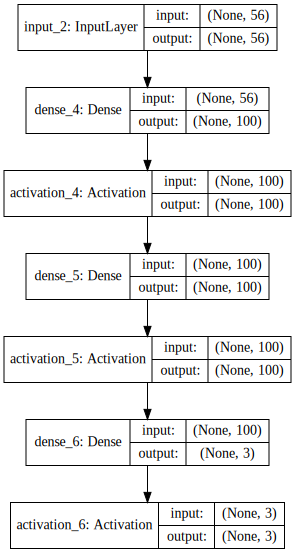

In [39]:
from keras.models import Model
from keras.layers import Input, Activation, Flatten, Dense, Concatenate
from keras.optimizers import Adam
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
import pydot as pyd
from keras.utils.np_utils import to_categorical
keras.utils.vis_utils.pydot = pyd

# We first need to define the sequence of dependencies (the computational graph)
inputs = Input(shape=(columns,))
d0 = Dense(units=100)(inputs)
a0 = Activation('relu')(d0)
d1 = Dense(units=100)(a0)
a1 = Activation('relu')(d1)
d2 = Dense(units=3)(a1)

# Concatenate the convolutional features and the vector input
output = Activation('softmax')(d2)

# define a model with two inputs
model = Model(inputs=inputs, outputs=output)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [40]:
history = model.fit(x_train, to_categorical(y_train+1), batch_size=32, epochs=20, validation_split=0.04)

Train on 19705 samples, validate on 822 samples
Epoch 1/20
19705/19705 [==============================] - 2s 81us/step - loss: 0.2107 - acc: 0.4649 - val_loss: 0.2060 - val_acc: 0.4757
Epoch 2/20
19705/19705 [==============================] - 1s 62us/step - loss: 0.2007 - acc: 0.5066 - val_loss: 0.2027 - val_acc: 0.4903
Epoch 3/20
19705/19705 [==============================] - 1s 73us/step - loss: 0.1984 - acc: 0.5149 - val_loss: 0.2005 - val_acc: 0.4976
Epoch 4/20
19705/19705 [==============================] - 1s 70us/step - loss: 0.1970 - acc: 0.5180 - val_loss: 0.1996 - val_acc: 0.5012
Epoch 5/20
19705/19705 [==============================] - 1s 64us/step - loss: 0.1961 - acc: 0.5228 - val_loss: 0.1986 - val_acc: 0.5036
Epoch 6/20
19705/19705 [==============================] - 1s 62us/step - loss: 0.1953 - acc: 0.5243 - val_loss: 0.1975 - val_acc: 0.5024
Epoch 7/20
19705/19705 [==============================] - 1s 62us/step - loss: 0.1946 - acc: 0.5271 - val_loss: 0.1984 - val_acc: 

### Let's have a look into labels of the Train, Test sets and Predictions

In [41]:
np.argmax(model.predict(x_test[:30]), axis=1)-1, y_test.values[:30]

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([ 0, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
         1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1], dtype=int64))

In [42]:
print("Y train")
print("Unique train labels:", np.unique(y_train.values))
print("Home win count:", (y_train==-1).sum())
print("Draw count:", (y_train==0).sum())
print("Away win count:", (y_train==1).sum())

Y train
Unique train labels: [-1  0  1]
Home win count: 5890
Draw count: 5217
Away win count: 9420


In [43]:
print("Train Prediction")
predictions = np.argmax(model.predict(x_train), axis=1)-1
print("Unique train labels:", np.unique(predictions))
print("Home win count:", (predictions==-1).sum())
print("Draw count:", (predictions==0).sum())
print("Away win count:", (predictions==1).sum())

Train Prediction
Unique train labels: [-1  0  1]
Home win count: 5317
Draw count: 1258
Away win count: 13952


In [44]:
print("Y test")
print("Unique train labels:", np.unique(y_test.values))
print("Home win count:", (y_test==-1).sum())
print("Draw count:", (y_test==0).sum())
print("Away win count:", (y_test==1).sum())

Y test
Unique train labels: [-1  0  1]
Home win count: 1478
Draw count: 1300
Away win count: 2354


In [45]:
print("Test Prediction")
predictions = np.argmax(model.predict(x_test), axis=1)-1
print("Unique train labels:", np.unique(predictions))
print("Home win count:", (predictions==-1).sum())
print("Draw count:", (predictions==0).sum())
print("Away win count:", (predictions==1).sum())

Test Prediction
Unique train labels: [-1  0  1]
Home win count: 1361
Draw count: 309
Away win count: 3462


# TODO! Add saliency mapping here

## Betting time...

In [59]:
predictions_shape_3x1 = model.predict(x_test)
predictions = np.argmax(predictions_shape_3x1, axis=1) - 1
predictions_categorical = to_categorical(predictions+1)
accuracy = (predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set prediction accuracy:", accuracy)

hw_accuracy = ((-1*np.ones_like(y_test)) == y_test.values).sum() / y_test.values.shape[0]
print("Bet home always wins accuracy:", hw_accuracy)

Test set prediction accuracy: 0.5278643803585347
Bet home always wins accuracy: 0.45869056897895555


### Outcome when bet on home team
Just a sanity check. Should not see high/any yields. Betting agencies cannot allow this to work.

In [63]:
agencies = ['B365', 'BW', 'IW', 'LB', 'WH', 'SJ', 'VC', 'GB', 'BS']

In [65]:
predict_home_wins = np.zeros((y_test.shape[0], 3))
predict_home_wins[:, 0] = 1

for agency in agencies:
    odds = pd.concat([bet_test[agency+'H'], bet_test[agency+'D'], bet_test[agency+'A']], axis=1)
    # r holds betting results. 0 indicates loss, value otherwise shows the win amount
    r = odds * predict_home_wins * to_categorical(y_test+1)
    # Take max value of win, draw, other win. 
    r = r.values.max(axis=1)
    # Let's say we bet 1€. then our profit(or loss) would be = earnings€ - 1€
    r -= 1
    
    print("Agency %s, \twin amount: %.2f" % (agency, r.sum()))

Agency B365, 	win amount: -24.49
Agency BW, 	win amount: -109.16
Agency IW, 	win amount: -207.18
Agency LB, 	win amount: -137.50
Agency WH, 	win amount: -70.90
Agency SJ, 	win amount: 151.43
Agency VC, 	win amount: 28.22
Agency GB, 	win amount: 172.61
Agency BS, 	win amount: 167.05


### Bet on every match
Always bet on the predicted winner.

In [66]:
for agency in agencies:
    odds = pd.concat([bet_test[agency+'H'], bet_test[agency+'D'], bet_test[agency+'A']], axis=1)
    # r holds betting results. 0 indicates loss, value otherwise shows the win amount
    r = odds * predictions_categorical * to_categorical(y_test+1)
    # Take max value of win, draw, other win. 
    r = r.values.max(axis=1)
    # Let's say we bet 1€. then our profit(or loss) would be = earnings€ - 1€
    r -= 1
    
    print("Agency %s, \twin amount: %.2f" % (agency, r.sum()))

Agency B365, 	win amount: 576.48
Agency BW, 	win amount: 486.83
Agency IW, 	win amount: 420.36
Agency LB, 	win amount: 464.26
Agency WH, 	win amount: 530.68
Agency SJ, 	win amount: 1259.77
Agency VC, 	win amount: 636.06
Agency GB, 	win amount: 1483.37
Agency BS, 	win amount: 1495.63


### Bet when expected return high enough
First calculate the expected return of the team expected to win. If yield is high enough, then bet. 
* yield = prediction probability * odds. 
* Bet if yield > SOMETHING.

In [86]:
SOMETHING = 1

for agency in agencies:
    odds = pd.concat([bet_test[agency+'H'], bet_test[agency+'D'], bet_test[agency+'A']], axis=1)
    # r holds betting results. 0 indicates loss, value otherwise shows the win amount
    bet = odds * predictions_categorical * predictions_shape_3x1 
    bet = bet > SOMETHING
    r = odds * predictions_categorical * to_categorical(y_test+1)
    r -= 1
    # Set win/lose amount to 0 on matched it didn't bet
    r[np.invert(bet)] = 0
    # Take max value of win, draw, other win. 
    r = r.values.max(axis=1)
    # print(odds.values[:5])
    # print((predictions_categorical*predictions_shape_3x1)[:5])
    # print(bet[:5])
    # print(odds[:5])
    # print(to_categorical(y_test+1)[:5])
    # print(r[:5])
    skip_percentage = (r==0).sum() / r.shape[0] * 100   
    print("Agency %s, \twin amount: %.2f. Didn't bet on %.2f%% of matches" % (agency, r.sum(), skip_percentage))

Agency B365, 	win amount: 2268.99. Didn't bet on 70.07% of matches
Agency BW, 	win amount: 2155.46. Didn't bet on 70.93% of matches
Agency IW, 	win amount: 2063.07. Didn't bet on 70.95% of matches
Agency LB, 	win amount: 2110.26. Didn't bet on 71.14% of matches
Agency WH, 	win amount: 2215.57. Didn't bet on 70.07% of matches
Agency SJ, 	win amount: 3100.41. Didn't bet on 64.65% of matches
Agency VC, 	win amount: 2340.00. Didn't bet on 69.70% of matches
Agency GB, 	win amount: 3368.35. Didn't bet on 62.14% of matches
Agency BS, 	win amount: 3385.17. Didn't bet on 62.16% of matches


### Bet on highest return
Multiplies the neural network match predictions with betting odds and from these multiplications chooses from home win, draw, away win the highest expected return value. A threshhold can be set to choose if the yield is high enough to bet.  [prediction probability * odds > SOMETHING]

In [117]:
SOMETHING = 2.5 # Set to 0, to bet on all matches

for agency in agencies:
    odds = pd.concat([bet_test[agency+'H'], bet_test[agency+'D'], bet_test[agency+'A']], axis=1)
    # Expected earning value. Basically expects that our NN predicts real match outcomes
    expected = (odds * predictions_shape_3x1).values
    
    # Threshold matches, when we'd actually would make a bet. If expected yield is too low, it'll pass
    bet = np.max(expected > SOMETHING, axis=1)
    
    # Take the highest yield of [home win, draw, other win]
    r = np.argmax(expected, axis=1) 
    
    # Calculate wins/losses according to real match results
    r = to_categorical(r) * to_categorical(y_test+1)
    r -= 1 # subtract our input bet
    
    # Calculate earnings
    r = r.max(axis=1) # Take max value of win, draw, other win. 
    r[np.invert(bet)] = 0 # Set win/lose amount to 0 on matched it didn't bet
    
    skip_percentage = (bet==0).sum() / bet.shape[0] * 100   
    print("Agency %s, \twin amount: %.2f. Didn't bet on %.2f%% of matches" % (agency, r.sum(), skip_percentage))

Agency B365, 	win amount: -60.00. Didn't bet on 98.38% of matches
Agency BW, 	win amount: -25.00. Didn't bet on 99.22% of matches
Agency IW, 	win amount: -16.00. Didn't bet on 99.45% of matches
Agency LB, 	win amount: -39.00. Didn't bet on 98.91% of matches
Agency WH, 	win amount: -42.00. Didn't bet on 98.77% of matches
Agency SJ, 	win amount: -74.00. Didn't bet on 96.73% of matches
Agency VC, 	win amount: -67.00. Didn't bet on 98.07% of matches
Agency GB, 	win amount: -59.00. Didn't bet on 96.94% of matches
Agency BS, 	win amount: -70.00. Didn't bet on 96.67% of matches
